In [1]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import logging
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rc('font',family='SimHei', size=13)
# os.chdir('')

In [11]:
data=pd.read_csv('pima-indians-diabetes.data.csv',names=list('abcdefgh')+['target'])

In [12]:
data.head()

,a,b,c,d,e,f,g,h,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.shape

(768, 9)

In [14]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test,y_train,y_test=train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3)

In [21]:
X_train.shape

(537, 8)

In [22]:
y_train.shape

(537,)

In [23]:
import lightgbm as lgb

In [24]:
clf=lgb.LGBMClassifier()

In [27]:
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
y_prob=clf.predict_proba(X_test)

In [29]:
y_pred=clf.predict(X_test)

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
fpr, tpr,threshold=roc_curve(y_test, y_prob[:,1])

In [36]:
fpr.shape

(80,)

In [37]:
tpr.shape

(80,)

In [43]:
threshold.max()

1.9913567388197877

In [44]:
threshold.min()

8.731072717717671e-05

In [67]:
auc_score=round(roc_auc_score(y_test,y_prob[:,1]), 3)

In [65]:
auc_score

0.7965432098765431

In [ ]:
def plot_roc(y_true, y_prob,filename):
    

### 需要优化调整的地方：
- 导入中文的字符
- 颜色选好看的颜色
- 调整字体大小

In [78]:

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [78]:

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [84]:
plt.style.use('ggplot')

In [105]:
params={
        'font.weight':'normal' #or 'blod'
        }
plt.rcParams.update(params)

ValueError: Invalid RGBA argument: 4

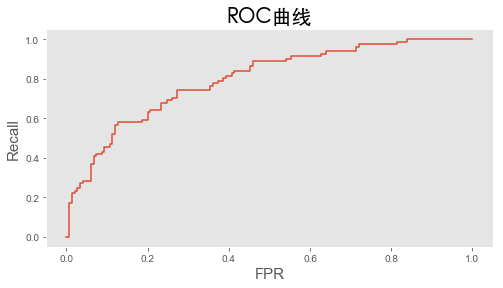

In [130]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc',size=10)


plt.rcParams['font.family']=['sans-serif']
# plt.rcParams['font.weight']=['blod']
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr,label='ROC')

plt.xlabel('FPR',fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.title('ROC曲线',fontproperties=font,fontsize=20)
plt.xticks(fontsize=10)
plt.grid(False)
plt.fill_between(fpr,tpr,0,color=RGB_list[0],alpha=0.25)
plt.annotate(s='auc '+str(auc_score),xy=(0.6,0.6),fontsize=20)
plt.legend(loc='upper right')

In [69]:
def plot_roc(y_true, y_prob, filename=False):
    auc = roc_auc_score(y_true, y_prob)
    fprs, tprs, thresholds = roc_curve(y_true, y_prob, pos_label=1) 
    plt.figure(figsize=(8, 4))
    plt.plot(fprs, tprs, 'r-', label='ROC', lw=1.5)    
    plt.fill_between(fprs, tprs, color='lightcoral', alpha=.25)
    
    plt.annotate('AUC : {:.3f}'.format(auc), xy=(0.4, 0.4), xytext=(0.4, 0.5), color='k', fontsize=13) 

    plt.legend(loc='lower right')
    plt.xlabel('FPR',fontsize=10)
    plt.ylabel('Recall', fontsize=10)
    plt.title('ROC')
    if filename:
        plt.savefig(filename)
    plt.show()
    

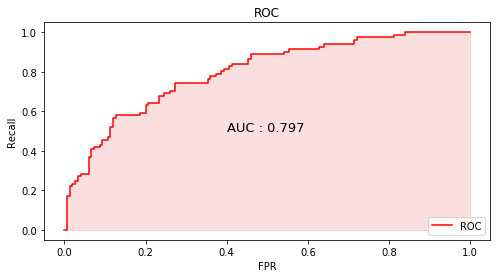

In [70]:
plot_roc(y_test, y_prob[:,1])

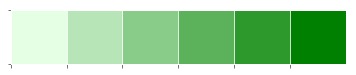

In [108]:
sns.palplot(sns.light_palette("green"))

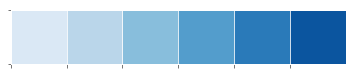

In [110]:
sns.palplot(sns.color_palette("Blues"))

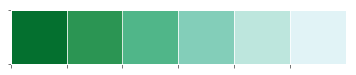

In [111]:
sns.palplot(sns.color_palette("BuGn_r"))

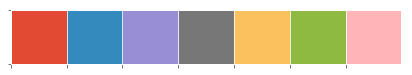

In [133]:
sns.palplot(sns.color_palette())

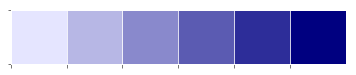

In [132]:
sns.palplot(sns.light_palette("navy"))

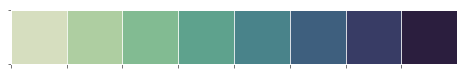

In [134]:
sns.palplot(sns.cubehelix_palette(8,start=.5,rot=-.75))
plt.show()

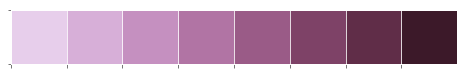

In [135]:
sns.palplot(sns.cubehelix_palette(8,start=.75,rot=-.150))
plt.show()

In [117]:
color_list_01=sns.color_palette("BuGn_r")

In [118]:
color_list_01

[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.5849288735101884, 0.3263514033064206),
 (0.31578623606305267, 0.7152633602460592, 0.5384390618992696),
 (0.516078431372549, 0.8108573625528642, 0.7273510188389081),
 (0.7419607843137255, 0.9027297193387159, 0.868958093041138),
 (0.8853517877739332, 0.9562168396770473, 0.9668281430219147)]

In [126]:
RGB_list=[]

In [128]:
for color in color_list_01:
    rgb_lis=[]
    for value in color:
        value*=255
        rgb_lis.append(int(value))
    RGB_list.append(rgb_lis)

In [129]:
RGB_list

[[4, 112, 47],
 [43, 149, 83],
 [80, 182, 137],
 [131, 206, 185],
 [189, 230, 221],
 [225, 243, 246]]